In [49]:
# Authors: Ankita Tomar, Harsh Pathak, Srinivasa Rudraraju and Yuwei Zhu
# This Python Program is used for data exploration of Home Depot datasets provided in the Kaggle Website

# Call Numpy and Pandas packages to load the datsets provided into matrix format and play around with the data

import numpy as np 
import pandas as pd 

# Load all the Training, Test, Attribute and Descriptions data using pandas modules
train_data = pd.read_csv("train.csv", encoding="ISO-8859-1")
test_data = pd.read_csv("test.csv", encoding="ISO-8859-1")
attributes_data = pd.read_csv("attributes.csv",encoding="ISO-8859-1")
product_descriptions_data = pd.read_csv("product_descriptions.csv",encoding="ISO-8859-1")

In [50]:
#Visualize the top 10 rows of each dataset
# Explore Datsets to see what data is provided, any missing values are present, outliers are patterns in the datasets.
print(str(train_data.info()))
print(str(train_data.describe()))
train_data[:10]
#There are 74067 entries in training data set with ID which is is unique identifier, product_uid which is specific to the
# product a customer searches, product_title is the title of the product the customer searches for, search_term is the 
# search term used to search for the product and relavance score is the score which we need to predict on test data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74067 entries, 0 to 74066
Data columns (total 5 columns):
id               74067 non-null int64
product_uid      74067 non-null int64
product_title    74067 non-null object
search_term      74067 non-null object
relevance        74067 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB
None
                  id    product_uid     relevance
count   74067.000000   74067.000000  74067.000000
mean   112385.709223  142331.911553      2.381634
std     64016.573650   30770.774864      0.533984
min         2.000000  100001.000000      1.000000
25%     57163.500000  115128.500000      2.000000
50%    113228.000000  137334.000000      2.330000
75%    168275.500000  166883.500000      3.000000
max    221473.000000  206650.000000      3.000000


,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00


In [51]:
print(str(test_data.info()))
print(str(test_data.describe()))
test_data[:10]
#Test Data also does not have any missing data with the exact same columns as training data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166693 entries, 0 to 166692
Data columns (total 4 columns):
id               166693 non-null int64
product_uid      166693 non-null int64
product_title    166693 non-null object
search_term      166693 non-null object
dtypes: int64(2), object(2)
memory usage: 6.4+ MB
None
                  id    product_uid
count  166693.000000  166693.000000
mean   123932.839741  149713.170445
std     71518.389174   37270.476881
min         1.000000  100001.000000
25%     61669.000000  116665.000000
50%    124004.000000  142445.000000
75%    187036.000000  179444.000000
max    240760.000000  224428.000000


,id,product_uid,product_title,search_term
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668
5,8,100001,Simpson Strong-Tie 12-Gauge Angle,wood connectors
6,10,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,bath and shower kit
7,11,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,bath drain kit
8,12,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,one piece tub shower
9,13,100004,Grape Solar 265-Watt Polycrystalline Solar Pan...,solar panel


In [52]:
print(str(attributes_data.info()))
print(str(attributes_data.describe()))
attributes_data[:10]
#Attributes Data has the attributes for each of the product id.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048562 entries, 0 to 1048561
Data columns (total 3 columns):
product_uid    1048485 non-null float64
name           1048485 non-null object
value          1047534 non-null object
dtypes: float64(1), object(2)
memory usage: 32.0+ MB
None
          product_uid
count  1048485.000000
mean    141234.975749
std      25617.762837
min     100001.000000
25%     117480.000000
50%     141922.000000
75%     166795.000000
max     178570.000000


,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90Â° connectio...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel
5,100001,Bullet06,Galvanized for extra corrosion resistance
6,100001,Bullet07,Install with 10d common nails or #9 x 1-1/2 in...
7,100001,Gauge,12
8,100001,Material,Galvanized Steel
9,100001,MFG Brand Name,Simpson Strong-Tie


In [53]:
print(str(product_descriptions_data.info()))
print(str(product_descriptions_data.describe()))
product_descriptions_data[:10]
#Product Description has the description for each type of the product.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124428 entries, 0 to 124427
Data columns (total 2 columns):
product_uid            124428 non-null int64
product_description    124428 non-null object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB
None
         product_uid
count  124428.000000
mean   162214.500000
std     35919.413985
min    100001.000000
25%    131107.750000
50%    162214.500000
75%    193321.250000
max    224428.000000


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...
5,100006,Achieving delicious results is almost effortle...
6,100007,The Quantum Adjustable 2-Light LED Black Emerg...
7,100008,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,100009,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,100010,Valley View Industries Metal Stakes (4-Pack) a...


In [54]:
# After Checking on the data we have identified that the descriptions and attributes data sets have additional insights into
# the products apart from product_title which can be used for finding relavance score with search_term.
# Merging the product description data into the training data matrix.
train_data = pd.merge(train_data, product_descriptions_data, on="product_uid", how="left")
train_data[:10]

,id,product_uid,product_title,search_term,relevance,product_description
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ..."
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ..."
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Achieving delicious results is almost effortle...
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,Achieving delicious results is almost effortle...
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,Achieving delicious results is almost effortle...
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...


In [55]:
#Explored Attributes Datsets to see what information about each product could be used to bring in more relavance while
# predicting the relavance score. The count of each individual attributes of a product from the attributes_data is shown below.
print(attributes_data.name.value_counts())
#Among the attributes fo each product we see that the brand name and bullet features are commonly provided for all the products.
#Brand Name seems to be a common information that could be used as it may also be a common search term while looking at 
# the training and test data.

MFG Brand Name                                  43389
Bullet02                                        43388
Bullet03                                        43375
Bullet04                                        43338
Bullet01                                        43228
Bullet05                                        31378
Product Width (in.)                             31114
Product Height (in.)                            28064
Product Depth (in.)                             27688
Bullet06                                        23579
Product Weight (lb.)                            23124
Color Family                                    20555
Bullet07                                        18043
Material                                        15775
Bullet08                                        14183
Color/Finish                                    14090
Certifications and Listings                     12994
Bullet09                                        11104
Assembled Height (in.)      

In [56]:
#Append Brand Names column to train data set.
brand_names = attributes_data[attributes_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "mfg_brand_name"})
train_data = pd.merge(train_data, brand_names, on="product_uid", how="left")
train_data[:10]

,id,product_uid,product_title,search_term,relevance,product_description,mfg_brand_name
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,BEHR Premium Textured DeckOver
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,Delta
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,Delta
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Achieving delicious results is almost effortle...,Whirlpool
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,Achieving delicious results is almost effortle...,Whirlpool
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,Achieving delicious results is almost effortle...,Whirlpool
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...,Lithonia Lighting
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...,House of Fara


In [57]:
print(train_data.mfg_brand_name.value_counts())
print(str(train_data.info()))
print(str(train_data.describe()))

Unbranded                         1823
Hampton Bay                       1258
GE                                 815
Everbilt                           662
Home Decorators Collection         592
DEWALT                             591
Ryobi                              544
KOHLER                             529
Philips                            498
Glacier Bay                        484
Delta                              459
RIDGID                             404
Veranda                            387
Prime-Line                         367
Milwaukee                          366
MOEN                               359
LG Electronics                     343
Lithonia Lighting                  321
Whirlpool                          309
Husky                              305
HDX                                301
Daltile                            286
MS International                   259
SharkBite                          252
BLACK+DECKER                       247
American Standard        

In [58]:
# Once we append the brand names to the train data we see that there are 44871 mfg_brand_name rows for the datasets.
# We have replaced with the blank cells to "Not Known" for all blank cells where product brand name was found. 
train_data.mfg_brand_name.fillna("Not Known", inplace=True)

In [59]:
# After appending we see that all the MFG Brand Names have some value against the column.
print(train_data.mfg_brand_name.value_counts())
print(str(train_data.info()))

Not Known                         29196
Unbranded                          1823
Hampton Bay                        1258
GE                                  815
Everbilt                            662
Home Decorators Collection          592
DEWALT                              591
Ryobi                               544
KOHLER                              529
Philips                             498
Glacier Bay                         484
Delta                               459
RIDGID                              404
Veranda                             387
Prime-Line                          367
Milwaukee                           366
MOEN                                359
LG Electronics                      343
Lithonia Lighting                   321
Whirlpool                           309
Husky                               305
HDX                                 301
Daltile                             286
MS International                    259
SharkBite                           252


In [60]:
# Count the number of times each product_uid occurs tp see how many different search terms are there for each product_uid
count_product_uid = pd.DataFrame(pd.Series(train_data.groupby(["product_uid"]).size(), name="count_product_uid"))
train_data = pd.merge(train_data, count_product_uid, left_on="product_uid", right_index=True, how="left")

In [61]:
#Count of the number of times a product_uid occurs in the dataset.
train_data[:10]

,id,product_uid,product_title,search_term,relevance,product_description,mfg_brand_name,count_product_uid
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie,2
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie,2
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,BEHR Premium Textured DeckOver,1
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,Delta,2
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,Delta,2
5,18,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,convection otr,3.00,Achieving delicious results is almost effortle...,Whirlpool,3
6,20,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwave over stove,2.67,Achieving delicious results is almost effortle...,Whirlpool,3
7,21,100006,Whirlpool 1.9 cu. ft. Over the Range Convectio...,microwaves,3.00,Achieving delicious results is almost effortle...,Whirlpool,3
8,23,100007,Lithonia Lighting Quantum 2-Light Black LED Em...,emergency light,2.67,The Quantum Adjustable 2-Light LED Black Emerg...,Lithonia Lighting,1
9,27,100009,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,mdf 3/4,3.00,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...,House of Fara,1


In [62]:
#Perform the same steps on test data sets
test_data = pd.merge(test_data, product_descriptions_data, on="product_uid", how="left")
brand_names = attributes_data[attributes_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "mfg_brand_name"})
test_data = pd.merge(test_data, brand_names, on="product_uid", how="left")
test_data.mfg_brand_name.fillna("Not Known", inplace=True)
count_product_uid = pd.DataFrame(pd.Series(test_data.groupby(["product_uid"]).size(), name="count_product_uid"))
test_data = pd.merge(test_data, count_product_uid, left_on="product_uid", right_index=True, how="left")
print(str(test_data.info()))
print(str(test_data.describe()))
test_data[:10]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166693 entries, 0 to 166692
Data columns (total 7 columns):
id                     166693 non-null int64
product_uid            166693 non-null int64
product_title          166693 non-null object
search_term            166693 non-null object
product_description    166693 non-null object
mfg_brand_name         166693 non-null object
count_product_uid      166693 non-null int64
dtypes: int64(3), object(4)
memory usage: 10.2+ MB
None
                  id    product_uid  count_product_uid
count  166693.000000  166693.000000      166693.000000
mean   123932.839741  149713.170445           3.187614
std     71518.389174   37270.476881           3.514928
min         1.000000  100001.000000           1.000000
25%     61669.000000  116665.000000           1.000000
50%    124004.000000  142445.000000           2.000000
75%    187036.000000  179444.000000           4.000000
max    240760.000000  224428.000000          52.000000


,id,product_uid,product_title,search_term,product_description,mfg_brand_name,count_product_uid
0,1,100001,Simpson Strong-Tie 12-Gauge Angle,90 degree bracket,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie,6
1,4,100001,Simpson Strong-Tie 12-Gauge Angle,metal l brackets,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie,6
2,5,100001,Simpson Strong-Tie 12-Gauge Angle,simpson sku able,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie,6
3,6,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong ties,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie,6
4,7,100001,Simpson Strong-Tie 12-Gauge Angle,simpson strong tie hcc668,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie,6
5,8,100001,Simpson Strong-Tie 12-Gauge Angle,wood connectors,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie,6
6,10,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,bath and shower kit,Classic architecture meets contemporary design...,STERLING,3
7,11,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,bath drain kit,Classic architecture meets contemporary design...,STERLING,3
8,12,100003,STERLING Ensemble 33-1/4 in. x 60 in. x 75-1/4...,one piece tub shower,Classic architecture meets contemporary design...,STERLING,3
9,13,100004,Grape Solar 265-Watt Polycrystalline Solar Pan...,solar panel,The Grape Solar 265-Watt Polycrystalline PV So...,Grape Solar,1


In [63]:
test_data.product_uid.value_counts()

101892    52
101280    35
101442    35
101148    34
102456    31
100898    31
102162    30
104691    27
109594    27
101959    26
102235    26
102954    26
101312    26
101024    25
105369    25
102567    25
100941    24
104899    24
100065    24
100526    24
103763    24
101027    23
112119    22
118371    22
102304    22
117268    22
102891    22
100409    22
100885    22
101272    22
          ..
192787     1
182548     1
180501     1
186646     1
174360     1
178458     1
170270     1
168223     1
223520     1
221473     1
143627     1
141576     1
215204     1
147717     1
213157     1
219302     1
217255     1
207016     1
204969     1
211114     1
209067     1
196781     1
125168     1
116980     1
114933     1
119031     1
112890     1
110843     1
162050     1
110474     1
Name: product_uid, dtype: int64

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

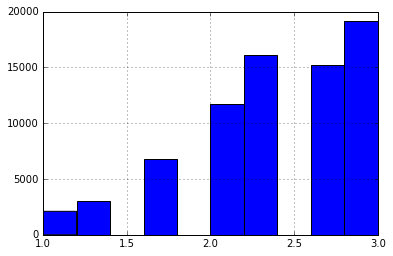

In [65]:
#Use Matplotlib module to see how frequently the 
%matplotlib inline
train_data.relevance.hist()
train_data.relevance.value_counts()

In [67]:
#Find most frequent words in search_term  field 
import collections
count_of_word = collections.Counter()
for term in train_data.search_term:
    count_of_word.update(term.lower().split())

total_count = sum(count_of_word.values())
print("Word Counts in search_term:")
for word, count in count_of_word.most_common(10):
    print("{}: {:.1f}% ({:,})".format(word, 100. * count / total_count, count))

Word Counts in search_term:
door: 1.1% (2,679)
light: 0.9% (2,021)
for: 0.8% (1,815)
in: 0.7% (1,665)
inch: 0.6% (1,487)
wall: 0.6% (1,442)
shower: 0.6% (1,429)
with: 0.6% (1,417)
white: 0.6% (1,354)
wood: 0.6% (1,349)


In [68]:
##################################################FEATURE SELECTION####################################################
#Extract the word count frequency with words in search_term and other fields which will be fed as inputs to ML algorithms.

# As part of data cleansing before feeding the data to any algorithm we need to do basic cleaning on all the fields that
# are compared with search_term, the fields with which we will compare with search_term are product_title, product_description
# and mfg_brand_name fields. 
from nltk.stem.snowball import SnowballStemmer

# Function to split words and convert them into lower case
def string_stemming(s):
    return " ".join([stemmer.stem(word) for word in s.lower().split()])

#Function to compare 2 strings to compare and find common words. This will be used for passing search_term and other fields
# which will be used to find the word counts which will be extracted as features and used to make relavance_score prediction.
def string_match_word(s1,s2):
    return sum(int(s2.find(word)>=0) for word in s1.split())

stemmer = SnowballStemmer('english')

train_size = train_data.shape[0]
train_test_data = pd.concat((train_data,test_data),axis=0, ignore_index=True)

In [69]:
train_test_data[:10]

,count_product_uid,id,mfg_brand_name,product_description,product_title,product_uid,relevance,search_term
0,2,2,Simpson Strong-Tie,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie 12-Gauge Angle,100001,3.00,angle bracket
1,2,3,Simpson Strong-Tie,"Not only do angles make joints stronger, they ...",Simpson Strong-Tie 12-Gauge Angle,100001,2.50,l bracket
2,1,9,BEHR Premium Textured DeckOver,BEHR Premium Textured DECKOVER is an innovativ...,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,100002,3.00,deck over
3,2,16,Delta,Update your bathroom with the Delta Vero Singl...,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.33,rain shower head
4,2,17,Delta,Update your bathroom with the Delta Vero Singl...,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,100005,2.67,shower only faucet
5,3,18,Whirlpool,Achieving delicious results is almost effortle...,Whirlpool 1.9 cu. ft. Over the Range Convectio...,100006,3.00,convection otr
6,3,20,Whirlpool,Achieving delicious results is almost effortle...,Whirlpool 1.9 cu. ft. Over the Range Convectio...,100006,2.67,microwave over stove
7,3,21,Whirlpool,Achieving delicious results is almost effortle...,Whirlpool 1.9 cu. ft. Over the Range Convectio...,100006,3.00,microwaves
8,1,23,Lithonia Lighting,The Quantum Adjustable 2-Light LED Black Emerg...,Lithonia Lighting Quantum 2-Light Black LED Em...,100007,2.67,emergency light
9,1,27,House of Fara,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...,House of Fara 3/4 in. x 3 in. x 8 ft. MDF Flut...,100009,3.00,mdf 3/4


In [70]:
train_test_data['search_term'] = train_test_data['search_term'].map(lambda x:string_stemming(x))
train_test_data['product_title'] = train_test_data['product_title'].map(lambda x:string_stemming(x))
train_test_data['product_description'] = train_test_data['product_description'].map(lambda x:string_stemming(x))
train_test_data['mfg_brand_name'] = train_test_data['mfg_brand_name'].map(lambda x:string_stemming(x))

train_test_data['search_term_length'] = train_test_data['search_term'].map(lambda x:len(x.split())).astype(np.int64)

train_test_data['combined_text'] = train_test_data['search_term']+"\t"+train_test_data['product_title']+"\t"+train_test_data['product_description']+"\t"+train_test_data['mfg_brand_name']

train_test_data['common_words_title'] = train_test_data['combined_text'].map(lambda x:string_match_word(x.split('\t')[0],x.split('\t')[1]))
train_test_data['common_words_description'] = train_test_data['combined_text'].map(lambda x:string_match_word(x.split('\t')[0],x.split('\t')[2]))
train_test_data['common_words_brandname'] = train_test_data['combined_text'].map(lambda x:string_match_word(x.split('\t')[0],x.split('\t')[3]))

train_test_data = train_test_data.drop(['search_term','product_title','product_description','combined_text','mfg_brand_name'],axis=1)

train_test_data[:10]

train_data = train_test_data.iloc[:train_size]
test_data = train_test_data.iloc[train_size:]
id_test = test_data['id']

In [81]:
train_data[:10]

,id,product_uid,relevance,search_term_length,common_words_title,common_words_description
0,2,100001,3.00,2,1,1
1,3,100001,2.50,2,1,1
2,9,100002,3.00,2,1,1
3,16,100005,2.33,3,1,1
4,17,100005,2.67,3,3,2
5,18,100006,3.00,2,1,2
6,20,100006,2.67,3,2,2
7,21,100006,3.00,1,1,1
8,23,100007,2.67,2,2,2
9,27,100009,3.00,2,2,2


In [72]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
y_train = train_data['relevance'].values
X_train = train_data.drop(['id','relevance'],axis=1).values
X_test = test_data.drop(['id','relevance'],axis=1).values

rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('D:/Google Drive/CIS SCM 593/Home Depot/submission_1.csv',index=False)

In [73]:
train_data[:10]

,count_product_uid,id,product_uid,relevance,search_term_length,common_words_title,common_words_description,common_words_brandname
0,2,2,100001,3.00,2,1,1,0
1,2,3,100001,2.50,2,1,1,0
2,1,9,100002,3.00,2,1,1,1
3,2,16,100005,2.33,3,1,1,0
4,2,17,100005,2.67,3,3,2,0
5,3,18,100006,3.00,2,1,2,0
6,3,20,100006,2.67,3,2,2,0
7,3,21,100006,3.00,1,1,1,0
8,1,23,100007,2.67,2,2,2,1
9,1,27,100009,3.00,2,2,2,0


In [74]:
test_data[:10]

,count_product_uid,id,product_uid,relevance,search_term_length,common_words_title,common_words_description,common_words_brandname
74067,6,1,100001,NaN,3,0,1,0
74068,6,4,100001,NaN,3,1,1,0
74069,6,5,100001,NaN,3,1,1,1
74070,6,6,100001,NaN,3,2,2,2
74071,6,7,100001,NaN,4,2,2,2
74072,6,8,100001,NaN,2,0,1,0
74073,3,10,100003,NaN,4,4,2,0
74074,3,11,100003,NaN,3,3,1,0
74075,3,12,100003,NaN,4,1,0,0
74076,1,13,100004,NaN,2,2,2,1


In [75]:
train_data = train_data.drop(['common_words_brandname'],axis=1)
test_data = test_data.drop(['common_words_brandname'],axis=1)

In [76]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
y_train = train_data['relevance'].values
X_train = train_data.drop(['id','relevance'],axis=1).values
X_test = test_data.drop(['id','relevance'],axis=1).values

rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('D:/Google Drive/CIS SCM 593/Home Depot/submission_2.csv',index=False)

In [77]:
train_data = train_data.drop(['count_product_uid'],axis=1)
test_data = test_data.drop(['count_product_uid'],axis=1)

In [78]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
y_train = train_data['relevance'].values
X_train = train_data.drop(['id','relevance'],axis=1).values
X_test = test_data.drop(['id','relevance'],axis=1).values

rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('D:/Google Drive/CIS SCM 593/Home Depot/submission_3.csv',index=False)

In [82]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
y_train = train_data['relevance'].values
X_train = train_data.drop(['id','relevance'],axis=1).values
X_test = test_data.drop(['id','relevance'],axis=1).values

rf = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=500, max_samples=0.1, random_state=25)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('D:/Google Drive/CIS SCM 593/Home Depot/submission_5.csv',index=False)

In [84]:
from datetime import datetime
startTime = datetime.now()
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
y_train = train_data['relevance'].values
X_train = train_data.drop(['id','relevance'],axis=1).values
X_test = test_data.drop(['id','relevance'],axis=1).values

rf = RandomForestRegressor(n_estimators=500, max_depth=6, random_state=0)
clf = BaggingRegressor(rf, n_estimators=1000, max_samples=0.1, random_state=25)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('D:/Google Drive/CIS SCM 593/Home Depot/submission_6.csv',index=False)
print(datetime.now() - startTime)

3:13:08.100544
